# Tensor Flow
A simple introduction to tensor flow + neural networks

I will use this library to get the linear / logistic regression in single layer neural network, using data I processed in `linear_and_logistic_regression`

**Reference**: [link](https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C2%20-%20Advanced%20Learning%20Algorithms/week1/optional-labs/C2_W1_Lab01_Neurons_and_Layers.ipynb)

# Data

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [128]:
def generate_data_with_noise(func):
  x = np.arange(1, 101, 1)
  y = func(x) + np.random.normal(0, 10, len(x))

  return x, y

In [129]:
func = lambda x : 3 * x + 2
x, y = generate_data_with_noise(func)

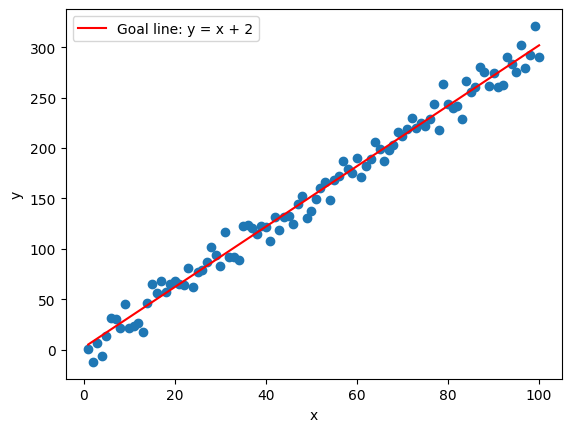

In [130]:
plt.scatter(x, y)
plt.plot(x, func(x), color='red', label='Goal line: y = x + 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


plt.show()

# Prepare Data

Tensor flow returning nan for y_pred. Let's normalize data so tensor flow can predict

In [131]:
x = x.reshape(-1, 1)

In [132]:
x_mean = np.mean(x)
x_std = np.std(x)
x = (x - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std

# Tensor Flow
Let's get this tensor flow to predict this about the data!

One neuron layer, that performs linear regression with gradient regression

In [133]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1], activation='linear')
])

model.compile(optimizer='sgd', loss='mean_squared_error')

/Users/912608/workspace/personal/machine learning/tf_env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [134]:
x = x.reshape(-1, 1)

In [135]:
model.fit(x, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0467 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0439 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0442 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0411 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0334 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0260 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 
Epoch 16/100
4/4 ━━

In [136]:
y_pred = model.predict(x)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [138]:
w, b = model.layers[0].get_weights()

In [ ]:
print(w, b)
w_denorm = w * (y_std / x_std)
b_denorm = b * y_std + y_mean - (w_denorm[0][0] * x_mean)

print(w_denorm, b_denorm) # I thought this was supposed to denormalize b?? Still looks quite normalized

[[0.9974688]] [-0.00347042]
[[3.02698552]] [-0.36487529]


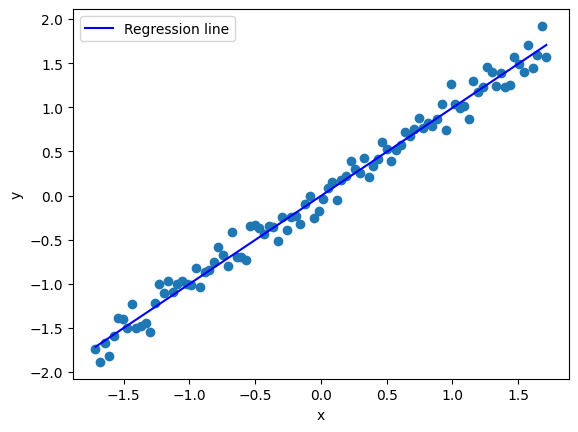

In [140]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Denormalized data

In [141]:
y_pred_denorm = (y_pred * y_std) + y_mean
y_denorm = (y * y_std) + y_mean
x_denorm = (x * x_std) + x_mean

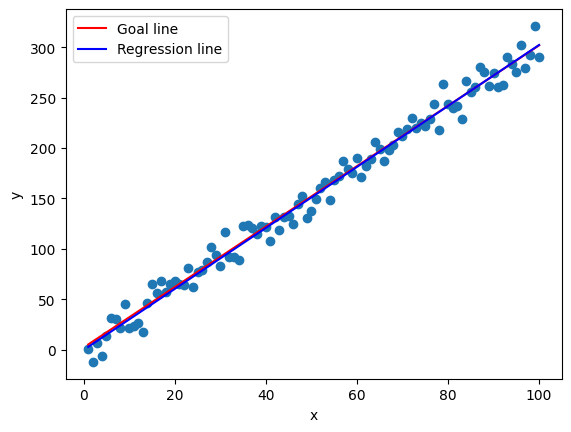

In [142]:
plt.scatter(x_denorm, y_denorm)
plt.plot(x_denorm, func(x_denorm), color='red', label='Goal line')
plt.plot(x_denorm, y_pred_denorm, color='blue', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()